In [1]:
import torch
import pandas as pd
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# from astropy.io import fits
import pdb
from scipy.ndimage.filters import maximum_filter1d
import glob
import fitsio as fits
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.nn.utils import clip_grad_norm_
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.distributions.normal import Normal
from tqdm import tqdm

In [2]:
df = pd.read_csv('gaia/joined.csv')

In [3]:
df = df.loc[~(df['rejected_by_photometry'] | df['rejected_by_variability'])]

In [4]:
df = df.loc[(df['time']>2200) & (df['time']<2222)]

In [5]:
df.loc[:, 't3'] = df['time'].apply(lambda x: np.round(x,3))
df.loc[:, 't2'] = df['time'].apply(lambda x: np.round(x,2))

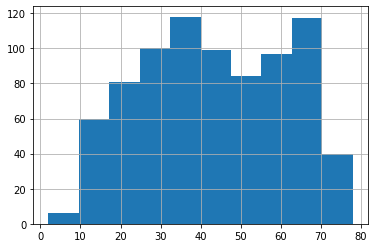

In [7]:
df.groupby('source_id')['t2'].apply(lambda x: len(list(x))).hist()

In [ ]:
df['t2'].value_counts()

In [ ]:
df['t2'].hist(bins=100)

In [ ]:
df['scaled'] = df.groupby('source_id')['flux_over_error'].transform(lambda x: (x-x.mean())/x.std())

In [ ]:
df.groupby('source_id')[['time', 't2', 't3']].count()

In [ ]:
df['t3'].hist()

In [ ]:
df.loc[df['time']>2200]['t3'].value_counts()

In [ ]:
col = 'flux_over_error'
col = 'mag'

In [ ]:
d3 = df.groupby(['source_id','t2'])[col].mean()
x = d3.loc[181646914411688960]

In [ ]:
sns.lineplot(x=x.index, y=x)

In [ ]:
d3 = df.groupby(['source_id','t3'])[col].mean()
x = d3.loc[181646914411688960]
sns.lineplot(x=x.index, y=x)

In [ ]:
d3 = df.loc[df['t2']<2222].groupby(['source_id','t2'])[col].mean()
x = d3.loc[181646914411688960]
sns.lineplot(x=x.index, y=x)

In [ ]:
x

In [ ]:
np.diff(x.index)

In [ ]:
print

In [ ]:
df=df.groupby(['source_id','t2'])['scaled'].mean()

In [ ]:
df = df.unstack(1).fillna(0).stack()

In [ ]:
df.name = 'scaled'

In [ ]:
df.loc[200261994165010176].head()

In [ ]:
df[181646914411688960].loc[df['time']<2222].plot()

In [ ]:
df = df.apply(lambda x: sorted(list(x.values.astype(np.float32)), key=lambda x: x[0]))

In [ ]:
df.reset_index().columns

In [ ]:
d=df.reset_index().groupby('source_id')[['t2','scaled']].apply(lambda x: sorted(list(x.values.astype(np.float32)), key=lambda x: x[0]))

In [ ]:
d.to_dict()